In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!git clone https://github.com/appie-mathematics/Deep-Hedging
%cd Deep-Hedging

Cloning into 'Deep-Hedging'...
remote: Enumerating objects: 426, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 426 (delta 62), reused 58 (delta 31), pack-reused 335
Receiving objects: 100% (426/426), 11.55 MiB | 18.02 MiB/s, done.
Resolving deltas: 100% (265/265), done.
/kaggle/working/Deep-Hedging


In [3]:
!git pull

Already up to date.


In [4]:
%ls

LICENSE  README.md  environment.yml  examples/  requirements.txt  src/


In [5]:
%cd src

/kaggle/working/Deep-Hedging/src


In [6]:
from typing import List
from matplotlib import pyplot as plt
import torch
from agents.Agent import Agent


from Costs import CostFunction, PorportionalCost
from agents.RecurrentAgent import RecurrentAgent
from agents.SimpleAgent import SimpleAgent
from instruments.Claims import Claim
from instruments.Derivatives import EuropeanCall, BSCall, BSPut, EuropeanPut
from instruments.Instruments import Instrument
from instruments.Primaries import GeometricBrownianStock, HestonStock
import RiskMeasures
from ExperimentRunner import ExperimentRunner, SimpleRunner, plot_dists

In [7]:
# Configuration
seed = 1337
torch.manual_seed(seed)

T = 30
total_rate = 0.0
step_interest_rate = (total_rate + 1) ** (1 / T) - 1
drift = step_interest_rate
volatility = 0.1
S0 = 1
stock = GeometricBrownianStock(S0, drift, volatility)
contingent_claim: Claim = BSCall(stock, S0, T, drift, volatility)
hedging_instruments: List[Instrument] = [stock]

criterion: torch.nn.Module = RiskMeasures.WorstCase()
prop_cost = 0.01
cost_function: CostFunction = PorportionalCost(prop_cost)
    
epochs = 200
paths = int(2e6)
h_dim = 15

verbose = T
animate = False
save = True
n = 10

Running on CUDA GPU


Training:   0%|          | 1/200 [00:05<16:49,  5.07s/epoch]

Epoch: 0, Loss:  472.54


Training:   1%|          | 2/200 [00:08<13:30,  4.09s/epoch]

Epoch: 1, Loss:  470.26


Training:   2%|▏         | 3/200 [00:11<12:27,  3.80s/epoch]

Epoch: 2, Loss:  322.64


Training:   2%|▏         | 4/200 [00:15<11:52,  3.63s/epoch]

Epoch: 3, Loss:  263.29


Training:   2%|▎         | 5/200 [00:18<11:31,  3.55s/epoch]

Epoch: 4, Loss:  153.94


Training:   3%|▎         | 6/200 [00:22<11:22,  3.52s/epoch]

Epoch: 5, Loss:  15.42


Training:   4%|▎         | 7/200 [00:26<11:44,  3.65s/epoch]

Epoch: 6, Loss:  14.23


Training:   4%|▍         | 8/200 [00:29<11:25,  3.57s/epoch]

Epoch: 7, Loss:  24.76


Training:   4%|▍         | 9/200 [00:32<11:14,  3.53s/epoch]

Epoch: 8, Loss:  36.30


Training:   5%|▌         | 10/200 [00:36<11:05,  3.50s/epoch]

Epoch: 9, Loss:  43.81


Training:   6%|▌         | 11/200 [00:39<10:57,  3.48s/epoch]

Epoch: 10, Loss:  53.46


Training:   6%|▌         | 12/200 [00:43<10:49,  3.45s/epoch]

Epoch: 11, Loss:  66.87


Training:   6%|▋         | 13/200 [00:46<10:42,  3.43s/epoch]

Epoch: 12, Loss:  68.59


Training:   7%|▋         | 14/200 [00:49<10:35,  3.42s/epoch]

Epoch: 13, Loss:  77.57


Training:   8%|▊         | 15/200 [00:53<10:31,  3.41s/epoch]

Epoch: 14, Loss:  68.23


Training:   8%|▊         | 16/200 [00:57<10:40,  3.48s/epoch]

Epoch: 15, Loss:  74.94


Training:   8%|▊         | 17/200 [01:00<10:32,  3.45s/epoch]

Epoch: 16, Loss:  69.98


Training:   9%|▉         | 18/200 [01:03<10:26,  3.44s/epoch]

Epoch: 17, Loss:  77.34


Training:  10%|▉         | 19/200 [01:07<10:26,  3.46s/epoch]

Epoch: 18, Loss:  78.55


Training:  10%|█         | 20/200 [01:10<10:19,  3.44s/epoch]

Epoch: 19, Loss:  72.72


Training:  10%|█         | 21/200 [01:14<10:13,  3.43s/epoch]

Epoch: 20, Loss:  71.67


Training:  11%|█         | 22/200 [01:17<10:11,  3.43s/epoch]

Epoch: 21, Loss:  83.63


Training:  12%|█▏        | 23/200 [01:20<10:05,  3.42s/epoch]

Epoch: 22, Loss:  59.62


Training:  12%|█▏        | 24/200 [01:24<10:01,  3.42s/epoch]

Epoch: 23, Loss:  63.99


Training:  12%|█▎        | 25/200 [01:27<09:58,  3.42s/epoch]

Epoch: 24, Loss:  62.82


Training:  13%|█▎        | 26/200 [01:31<09:55,  3.42s/epoch]

Epoch: 25, Loss:  60.78


Training:  14%|█▎        | 27/200 [01:34<09:52,  3.42s/epoch]

Epoch: 26, Loss:  57.01


Training:  14%|█▍        | 28/200 [01:38<09:50,  3.43s/epoch]

Epoch: 27, Loss:  57.56


Training:  14%|█▍        | 29/200 [01:41<09:45,  3.42s/epoch]

Epoch: 28, Loss:  49.52


Training:  15%|█▌        | 30/200 [01:44<09:40,  3.41s/epoch]

Epoch: 29, Loss:  47.52


Training:  16%|█▌        | 31/200 [01:48<09:36,  3.41s/epoch]

Epoch: 30, Loss:  42.72


Training:  16%|█▌        | 32/200 [01:51<09:33,  3.41s/epoch]

Epoch: 31, Loss:  43.35


Training:  16%|█▋        | 33/200 [01:55<09:29,  3.41s/epoch]

Epoch: 32, Loss:  41.01


Training:  17%|█▋        | 34/200 [01:58<09:27,  3.42s/epoch]

Epoch: 33, Loss:  37.73


Training:  18%|█▊        | 35/200 [02:02<09:49,  3.57s/epoch]

Epoch: 34, Loss:  32.70


Training:  18%|█▊        | 36/200 [02:05<09:37,  3.52s/epoch]

Epoch: 35, Loss:  28.33


Training:  18%|█▊        | 37/200 [02:09<09:28,  3.49s/epoch]

Epoch: 36, Loss:  30.29


Training:  19%|█▉        | 38/200 [02:12<09:22,  3.47s/epoch]

Epoch: 37, Loss:  24.88


Training:  20%|█▉        | 39/200 [02:16<09:15,  3.45s/epoch]

Epoch: 38, Loss:  20.65


Training:  20%|██        | 40/200 [02:19<09:09,  3.43s/epoch]

Epoch: 39, Loss:  16.54


Training:  20%|██        | 41/200 [02:22<09:06,  3.44s/epoch]

Epoch: 40, Loss:  11.70


Training:  21%|██        | 42/200 [02:26<09:00,  3.42s/epoch]

Epoch: 41, Loss:  9.03


Training:  22%|██▏       | 43/200 [02:29<08:56,  3.42s/epoch]

Epoch: 42, Loss:  4.22


Training:  22%|██▏       | 44/200 [02:33<09:05,  3.50s/epoch]

Epoch: 43, Loss:  10.08


Training:  22%|██▎       | 45/200 [02:36<08:59,  3.48s/epoch]

Epoch: 44, Loss:  3.30


Training:  23%|██▎       | 46/200 [02:40<08:52,  3.46s/epoch]

Epoch: 45, Loss:  2.69


Training:  24%|██▎       | 47/200 [02:43<08:45,  3.44s/epoch]

Epoch: 46, Loss:  5.10


Training:  24%|██▍       | 48/200 [02:47<08:40,  3.42s/epoch]

Epoch: 47, Loss:  6.12


Training:  24%|██▍       | 49/200 [02:50<08:35,  3.41s/epoch]

Epoch: 48, Loss:  6.39


Training:  25%|██▌       | 50/200 [02:53<08:30,  3.41s/epoch]

Epoch: 49, Loss:  7.43


Training:  26%|██▌       | 51/200 [02:57<08:31,  3.44s/epoch]

Epoch: 50, Loss:  6.71


Training:  26%|██▌       | 52/200 [03:00<08:30,  3.45s/epoch]

Epoch: 51, Loss:  6.30


Training:  26%|██▋       | 53/200 [03:04<08:25,  3.44s/epoch]

Epoch: 52, Loss:  5.37


Training:  27%|██▋       | 54/200 [03:07<08:24,  3.45s/epoch]

Epoch: 53, Loss:  4.60


Training:  28%|██▊       | 55/200 [03:11<08:19,  3.44s/epoch]

Epoch: 54, Loss:  3.29


Training:  28%|██▊       | 56/200 [03:14<08:14,  3.43s/epoch]

Epoch: 55, Loss:  2.56


Training:  28%|██▊       | 57/200 [03:18<08:13,  3.45s/epoch]

Epoch: 56, Loss:  2.50


Training:  29%|██▉       | 58/200 [03:21<08:08,  3.44s/epoch]

Epoch: 57, Loss:  2.08


Training:  30%|██▉       | 59/200 [03:24<08:02,  3.43s/epoch]

Epoch: 58, Loss:  1.93


Training:  30%|███       | 60/200 [03:28<08:00,  3.43s/epoch]

Epoch: 59, Loss:  2.48


Training:  30%|███       | 61/200 [03:31<07:54,  3.42s/epoch]

Epoch: 60, Loss:  2.76


Training:  31%|███       | 62/200 [03:35<07:51,  3.41s/epoch]

Epoch: 61, Loss:  2.65


Training:  32%|███▏      | 63/200 [03:38<08:04,  3.53s/epoch]

Epoch: 62, Loss:  2.35


Training:  32%|███▏      | 64/200 [03:42<07:55,  3.49s/epoch]

Epoch: 63, Loss:  2.12


Training:  32%|███▎      | 65/200 [03:45<07:47,  3.46s/epoch]

Epoch: 64, Loss:  1.65


Training:  33%|███▎      | 66/200 [03:49<07:41,  3.44s/epoch]

Epoch: 65, Loss:  3.15


Training:  34%|███▎      | 67/200 [03:52<07:38,  3.45s/epoch]

Epoch: 66, Loss:  2.19


Training:  34%|███▍      | 68/200 [03:55<07:32,  3.43s/epoch]

Epoch: 67, Loss:  3.11


Training:  34%|███▍      | 69/200 [03:59<07:30,  3.44s/epoch]

Epoch: 68, Loss:  3.67


Training:  35%|███▌      | 70/200 [04:02<07:26,  3.44s/epoch]

Epoch: 69, Loss:  3.78


Training:  36%|███▌      | 71/200 [04:06<07:21,  3.43s/epoch]

Epoch: 70, Loss:  3.80


Training:  36%|███▌      | 72/200 [04:09<07:30,  3.52s/epoch]

Epoch: 71, Loss:  4.20


Training:  36%|███▋      | 73/200 [04:13<07:25,  3.51s/epoch]

Epoch: 72, Loss:  3.21


Training:  37%|███▋      | 74/200 [04:16<07:19,  3.48s/epoch]

Epoch: 73, Loss:  2.48


Training:  38%|███▊      | 75/200 [04:20<07:12,  3.46s/epoch]

Epoch: 74, Loss:  1.59


Training:  38%|███▊      | 76/200 [04:23<07:07,  3.44s/epoch]

Epoch: 75, Loss:  6.09


Training:  38%|███▊      | 77/200 [04:27<07:02,  3.43s/epoch]

Epoch: 76, Loss:  1.52


Training:  39%|███▉      | 78/200 [04:30<07:04,  3.48s/epoch]

Epoch: 77, Loss:  2.12


Training:  40%|███▉      | 79/200 [04:34<06:58,  3.46s/epoch]

Epoch: 78, Loss:  2.35


Training:  40%|████      | 80/200 [04:37<06:55,  3.46s/epoch]

Epoch: 79, Loss:  2.12


Training:  40%|████      | 81/200 [04:41<06:56,  3.50s/epoch]

Epoch: 80, Loss:  1.83


Training:  41%|████      | 82/200 [04:44<06:49,  3.47s/epoch]

Epoch: 81, Loss:  1.63


Training:  42%|████▏     | 83/200 [04:47<06:43,  3.45s/epoch]

Epoch: 82, Loss:  2.33


Training:  42%|████▏     | 84/200 [04:51<06:37,  3.43s/epoch]

Epoch: 83, Loss:  2.86


Training:  42%|████▎     | 85/200 [04:54<06:33,  3.42s/epoch]

Epoch: 84, Loss:  3.26


Training:  43%|████▎     | 86/200 [04:58<06:32,  3.44s/epoch]

Epoch: 85, Loss:  4.03


Training:  44%|████▎     | 87/200 [05:01<06:30,  3.46s/epoch]

Epoch: 86, Loss:  4.34


Training:  44%|████▍     | 88/200 [05:05<06:25,  3.44s/epoch]

Epoch: 87, Loss:  4.36


Training:  44%|████▍     | 89/200 [05:08<06:22,  3.45s/epoch]

Epoch: 88, Loss:  3.95


Training:  45%|████▌     | 90/200 [05:11<06:17,  3.43s/epoch]

Epoch: 89, Loss:  4.42


Training:  46%|████▌     | 91/200 [05:15<06:14,  3.44s/epoch]

Epoch: 90, Loss:  3.07


Training:  46%|████▌     | 92/200 [05:18<06:10,  3.43s/epoch]

Epoch: 91, Loss:  2.23


Training:  46%|████▋     | 93/200 [05:22<06:05,  3.42s/epoch]

Epoch: 92, Loss:  1.50


Training:  47%|████▋     | 94/200 [05:25<06:01,  3.41s/epoch]

Epoch: 93, Loss:  8.36


Training:  48%|████▊     | 95/200 [05:29<05:57,  3.41s/epoch]

Epoch: 94, Loss:  2.31


Training:  48%|████▊     | 96/200 [05:32<05:56,  3.43s/epoch]

Epoch: 95, Loss:  2.81


Training:  48%|████▊     | 97/200 [05:35<05:52,  3.43s/epoch]

Epoch: 96, Loss:  3.82


Training:  49%|████▉     | 98/200 [05:39<05:48,  3.42s/epoch]

Epoch: 97, Loss:  3.70


Training:  50%|████▉     | 99/200 [05:42<05:46,  3.44s/epoch]

Epoch: 98, Loss:  3.84


Training:  50%|█████     | 100/200 [05:46<05:55,  3.56s/epoch]

Epoch: 99, Loss:  4.13


Training:  50%|█████     | 101/200 [05:50<05:46,  3.50s/epoch]

Epoch: 100, Loss:  3.15


Training:  51%|█████     | 102/200 [05:53<05:42,  3.50s/epoch]

Epoch: 101, Loss:  2.61


Training:  52%|█████▏    | 103/200 [05:56<05:36,  3.47s/epoch]

Epoch: 102, Loss:  1.50


Training:  52%|█████▏    | 104/200 [06:00<05:31,  3.45s/epoch]

Epoch: 103, Loss:  5.46


Training:  52%|█████▎    | 105/200 [06:03<05:28,  3.46s/epoch]

Epoch: 104, Loss:  2.05


Training:  53%|█████▎    | 106/200 [06:07<05:23,  3.44s/epoch]

Epoch: 105, Loss:  2.80


Training:  54%|█████▎    | 107/200 [06:10<05:18,  3.42s/epoch]

Epoch: 106, Loss:  3.86


Training:  54%|█████▍    | 108/200 [06:14<05:15,  3.43s/epoch]

Epoch: 107, Loss:  3.84


Training:  55%|█████▍    | 109/200 [06:17<05:18,  3.50s/epoch]

Epoch: 108, Loss:  4.16


Training:  55%|█████▌    | 110/200 [06:21<05:12,  3.47s/epoch]

Epoch: 109, Loss:  3.49


Training:  56%|█████▌    | 111/200 [06:24<05:06,  3.45s/epoch]

Epoch: 110, Loss:  3.50


Training:  56%|█████▌    | 112/200 [06:27<05:02,  3.43s/epoch]

Epoch: 111, Loss:  2.50


Training:  56%|█████▋    | 113/200 [06:31<04:57,  3.42s/epoch]

Epoch: 112, Loss:  1.78


Training:  57%|█████▋    | 114/200 [06:34<04:54,  3.43s/epoch]

Epoch: 113, Loss:  2.85


Training:  57%|█████▊    | 115/200 [06:38<04:51,  3.43s/epoch]

Epoch: 114, Loss:  4.58


Training:  58%|█████▊    | 116/200 [06:41<04:47,  3.42s/epoch]

Epoch: 115, Loss:  3.75


Training:  58%|█████▊    | 117/200 [06:44<04:43,  3.42s/epoch]

Epoch: 116, Loss:  2.21


Training:  59%|█████▉    | 118/200 [06:48<04:41,  3.44s/epoch]

Epoch: 117, Loss:  4.00


Training:  60%|█████▉    | 119/200 [06:51<04:37,  3.42s/epoch]

Epoch: 118, Loss:  4.22


Training:  60%|██████    | 120/200 [06:55<04:33,  3.41s/epoch]

Epoch: 119, Loss:  4.86


Training:  60%|██████    | 121/200 [06:58<04:31,  3.43s/epoch]

Epoch: 120, Loss:  4.45


Training:  61%|██████    | 122/200 [07:02<04:26,  3.42s/epoch]

Epoch: 121, Loss:  4.78


Training:  62%|██████▏   | 123/200 [07:05<04:22,  3.41s/epoch]

Epoch: 122, Loss:  4.62


Training:  62%|██████▏   | 124/200 [07:08<04:19,  3.42s/epoch]

Epoch: 123, Loss:  4.01


Training:  62%|██████▎   | 125/200 [07:12<04:15,  3.41s/epoch]

Epoch: 124, Loss:  2.97


Training:  63%|██████▎   | 126/200 [07:15<04:12,  3.41s/epoch]

Epoch: 125, Loss:  2.01


Training:  64%|██████▎   | 127/200 [07:19<04:08,  3.41s/epoch]

Epoch: 126, Loss:  3.19


Training:  64%|██████▍   | 128/200 [07:22<04:14,  3.54s/epoch]

Epoch: 127, Loss:  1.49


Training:  64%|██████▍   | 129/200 [07:26<04:08,  3.49s/epoch]

Epoch: 128, Loss:  1.59


Training:  65%|██████▌   | 130/200 [07:29<04:02,  3.46s/epoch]

Epoch: 129, Loss:  1.57


Training:  66%|██████▌   | 131/200 [07:33<03:57,  3.45s/epoch]

Epoch: 130, Loss:  1.49


Training:  66%|██████▌   | 132/200 [07:36<03:54,  3.44s/epoch]

Epoch: 131, Loss:  2.59


Training:  66%|██████▋   | 133/200 [07:39<03:49,  3.43s/epoch]

Epoch: 132, Loss:  1.78


Training:  67%|██████▋   | 134/200 [07:43<03:47,  3.45s/epoch]

Epoch: 133, Loss:  1.86


Training:  68%|██████▊   | 135/200 [07:46<03:43,  3.43s/epoch]

Epoch: 134, Loss:  1.79


Training:  68%|██████▊   | 136/200 [07:50<03:39,  3.43s/epoch]

Epoch: 135, Loss:  1.71


Training:  68%|██████▊   | 137/200 [07:54<03:43,  3.55s/epoch]

Epoch: 136, Loss:  1.57


Training:  69%|██████▉   | 138/200 [07:57<03:37,  3.50s/epoch]

Epoch: 137, Loss:  3.16


Training:  70%|██████▉   | 139/200 [08:00<03:31,  3.47s/epoch]

Epoch: 138, Loss:  1.97


Training:  70%|███████   | 140/200 [08:04<03:29,  3.49s/epoch]

Epoch: 139, Loss:  3.05


Training:  70%|███████   | 141/200 [08:07<03:24,  3.46s/epoch]

Epoch: 140, Loss:  3.51


Training:  71%|███████   | 142/200 [08:11<03:19,  3.44s/epoch]

Epoch: 141, Loss:  3.11


Training:  72%|███████▏  | 143/200 [08:14<03:15,  3.43s/epoch]

Epoch: 142, Loss:  2.89


Training:  72%|███████▏  | 144/200 [08:18<03:12,  3.43s/epoch]

Epoch: 143, Loss:  2.84


Training:  72%|███████▎  | 145/200 [08:21<03:08,  3.42s/epoch]

Epoch: 144, Loss:  2.33


Training:  73%|███████▎  | 146/200 [08:24<03:05,  3.44s/epoch]

Epoch: 145, Loss:  2.39


Training:  74%|███████▎  | 147/200 [08:28<03:01,  3.43s/epoch]

Epoch: 146, Loss:  2.36


Training:  74%|███████▍  | 148/200 [08:31<02:57,  3.41s/epoch]

Epoch: 147, Loss:  2.32


Training:  74%|███████▍  | 149/200 [08:35<02:54,  3.42s/epoch]

Epoch: 148, Loss:  2.35


Training:  75%|███████▌  | 150/200 [08:38<02:52,  3.45s/epoch]

Epoch: 149, Loss:  1.77


Training:  76%|███████▌  | 151/200 [08:42<02:48,  3.45s/epoch]

Epoch: 150, Loss:  2.79


Training:  76%|███████▌  | 152/200 [08:45<02:44,  3.44s/epoch]

Epoch: 151, Loss:  2.35


Training:  76%|███████▋  | 153/200 [08:49<02:42,  3.45s/epoch]

Epoch: 152, Loss:  2.70


Training:  77%|███████▋  | 154/200 [08:52<02:37,  3.43s/epoch]

Epoch: 153, Loss:  3.13


Training:  78%|███████▊  | 155/200 [08:55<02:34,  3.43s/epoch]

Epoch: 154, Loss:  3.24


Training:  78%|███████▊  | 156/200 [08:59<02:34,  3.51s/epoch]

Epoch: 155, Loss:  2.89


Training:  78%|███████▊  | 157/200 [09:02<02:29,  3.48s/epoch]

Epoch: 156, Loss:  2.63


Training:  79%|███████▉  | 158/200 [09:06<02:25,  3.46s/epoch]

Epoch: 157, Loss:  2.01


Training:  80%|███████▉  | 159/200 [09:09<02:22,  3.49s/epoch]

Epoch: 158, Loss:  1.68


Training:  80%|████████  | 160/200 [09:13<02:18,  3.46s/epoch]

Epoch: 159, Loss:  1.49


Training:  80%|████████  | 161/200 [09:16<02:14,  3.44s/epoch]

Epoch: 160, Loss:  2.24


Training:  81%|████████  | 162/200 [09:20<02:10,  3.43s/epoch]

Epoch: 161, Loss:  2.49


Training:  82%|████████▏ | 163/200 [09:23<02:06,  3.42s/epoch]

Epoch: 162, Loss:  2.54


Training:  82%|████████▏ | 164/200 [09:26<02:02,  3.41s/epoch]

Epoch: 163, Loss:  2.57


Training:  82%|████████▎ | 165/200 [09:30<02:05,  3.57s/epoch]

Epoch: 164, Loss:  2.56


Training:  83%|████████▎ | 166/200 [09:34<02:00,  3.53s/epoch]

Epoch: 165, Loss:  1.65


Training:  84%|████████▎ | 167/200 [09:37<01:55,  3.51s/epoch]

Epoch: 166, Loss:  4.26


Training:  84%|████████▍ | 168/200 [09:41<01:51,  3.48s/epoch]

Epoch: 167, Loss:  2.34


Training:  84%|████████▍ | 169/200 [09:44<01:48,  3.49s/epoch]

Epoch: 168, Loss:  3.31


Training:  85%|████████▌ | 170/200 [09:48<01:44,  3.47s/epoch]

Epoch: 169, Loss:  4.05


Training:  86%|████████▌ | 171/200 [09:51<01:40,  3.45s/epoch]

Epoch: 170, Loss:  4.68


Training:  86%|████████▌ | 172/200 [09:54<01:36,  3.45s/epoch]

Epoch: 171, Loss:  4.98


Training:  86%|████████▋ | 173/200 [09:58<01:32,  3.44s/epoch]

Epoch: 172, Loss:  5.20


Training:  87%|████████▋ | 174/200 [10:02<01:31,  3.53s/epoch]

Epoch: 173, Loss:  4.38


Training:  88%|████████▊ | 175/200 [10:05<01:27,  3.51s/epoch]

Epoch: 174, Loss:  3.26


Training:  88%|████████▊ | 176/200 [10:08<01:23,  3.48s/epoch]

Epoch: 175, Loss:  2.45


Training:  88%|████████▊ | 177/200 [10:12<01:19,  3.46s/epoch]

Epoch: 176, Loss:  3.06


Training:  89%|████████▉ | 178/200 [10:15<01:15,  3.45s/epoch]

Epoch: 177, Loss:  4.69


Training:  90%|████████▉ | 179/200 [10:19<01:12,  3.43s/epoch]

Epoch: 178, Loss:  3.09


Training:  90%|█████████ | 180/200 [10:22<01:08,  3.43s/epoch]

Epoch: 179, Loss:  2.09


Training:  90%|█████████ | 181/200 [10:25<01:04,  3.41s/epoch]

Epoch: 180, Loss:  2.76


Training:  91%|█████████ | 182/200 [10:29<01:01,  3.41s/epoch]

Epoch: 181, Loss:  2.93


Training:  92%|█████████▏| 183/200 [10:32<00:57,  3.40s/epoch]

Epoch: 182, Loss:  3.30


Training:  92%|█████████▏| 184/200 [10:36<00:54,  3.40s/epoch]

Epoch: 183, Loss:  3.03


Training:  92%|█████████▎| 185/200 [10:39<00:51,  3.43s/epoch]

Epoch: 184, Loss:  2.53


Training:  93%|█████████▎| 186/200 [10:43<00:47,  3.42s/epoch]

Epoch: 185, Loss:  1.98


Training:  94%|█████████▎| 187/200 [10:46<00:44,  3.41s/epoch]

Epoch: 186, Loss:  1.73


Training:  94%|█████████▍| 188/200 [10:49<00:41,  3.43s/epoch]

Epoch: 187, Loss:  2.38


Training:  94%|█████████▍| 189/200 [10:53<00:37,  3.44s/epoch]

Epoch: 188, Loss:  1.68


Training:  95%|█████████▌| 190/200 [10:56<00:34,  3.43s/epoch]

Epoch: 189, Loss:  2.01


Training:  96%|█████████▌| 191/200 [11:00<00:31,  3.46s/epoch]

Epoch: 190, Loss:  2.11


Training:  96%|█████████▌| 192/200 [11:03<00:27,  3.44s/epoch]

Epoch: 191, Loss:  1.84


Training:  96%|█████████▋| 193/200 [11:07<00:24,  3.54s/epoch]

Epoch: 192, Loss:  1.65


Training:  97%|█████████▋| 194/200 [11:10<00:21,  3.53s/epoch]

Epoch: 193, Loss:  2.22


Training:  98%|█████████▊| 195/200 [11:14<00:17,  3.49s/epoch]

Epoch: 194, Loss:  2.62


Training:  98%|█████████▊| 196/200 [11:17<00:13,  3.46s/epoch]

Epoch: 195, Loss:  1.62


Training:  98%|█████████▊| 197/200 [11:21<00:10,  3.45s/epoch]

Epoch: 196, Loss:  1.89


Training:  99%|█████████▉| 198/200 [11:24<00:06,  3.44s/epoch]

Epoch: 197, Loss:  1.50


Training: 100%|█████████▉| 199/200 [11:28<00:03,  3.43s/epoch]

Epoch: 198, Loss:  1.66


Epoch: 199, Loss:  2.00


-1.6601899862289429


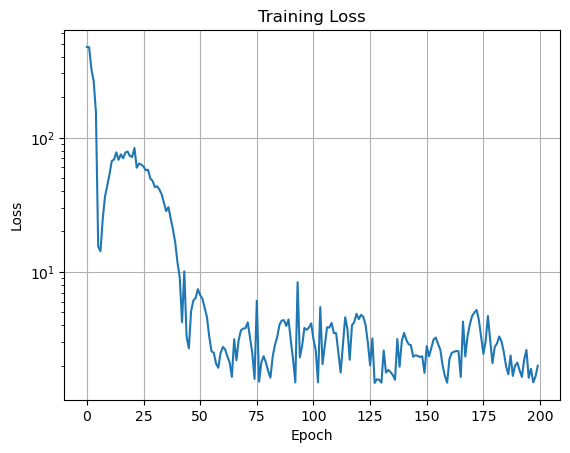

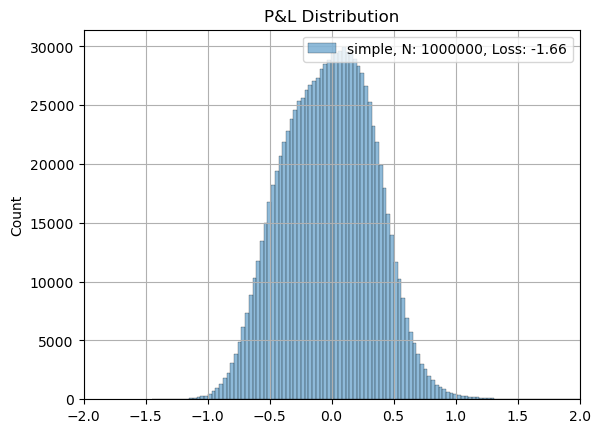

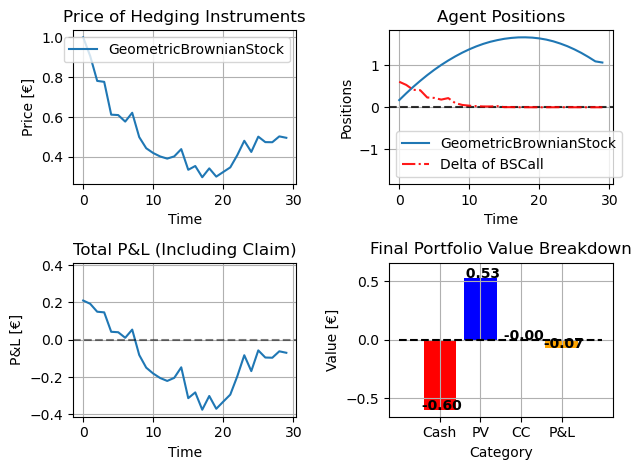

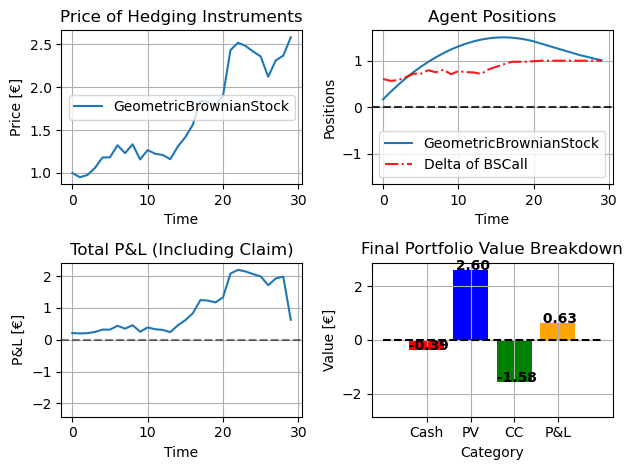

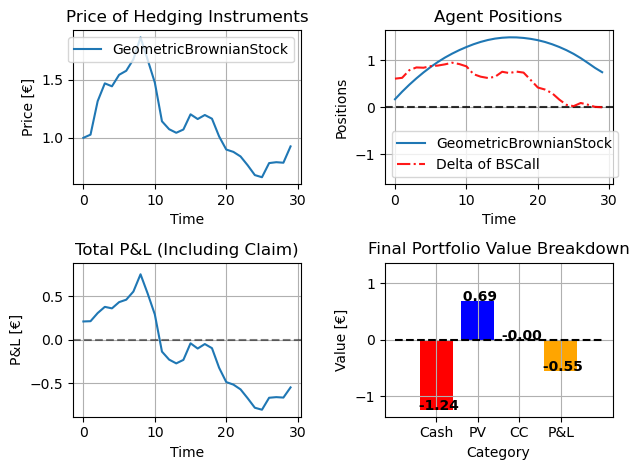

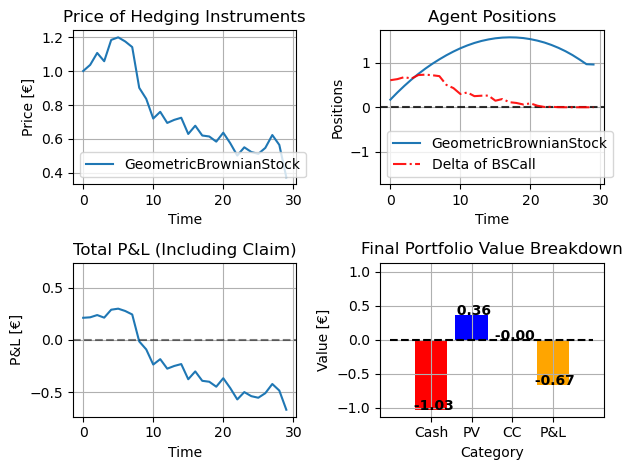

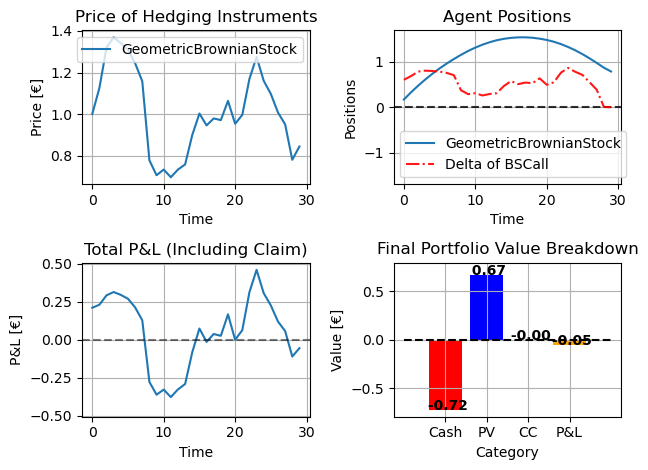

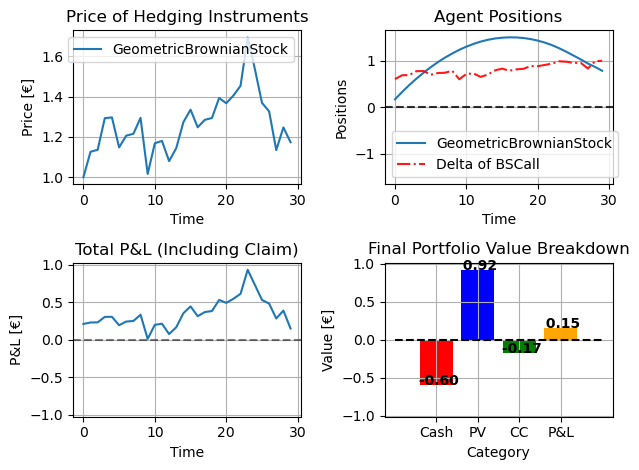

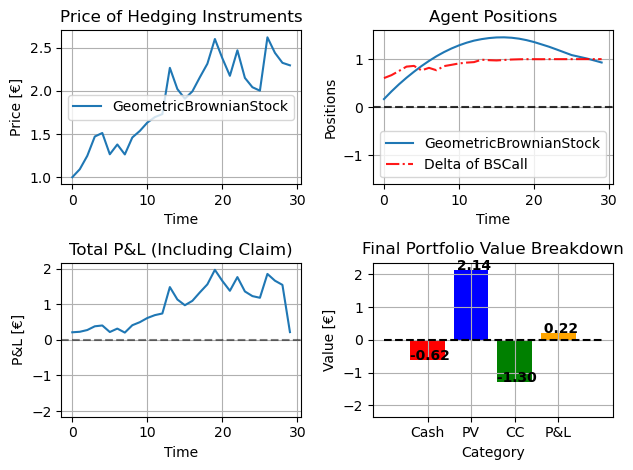

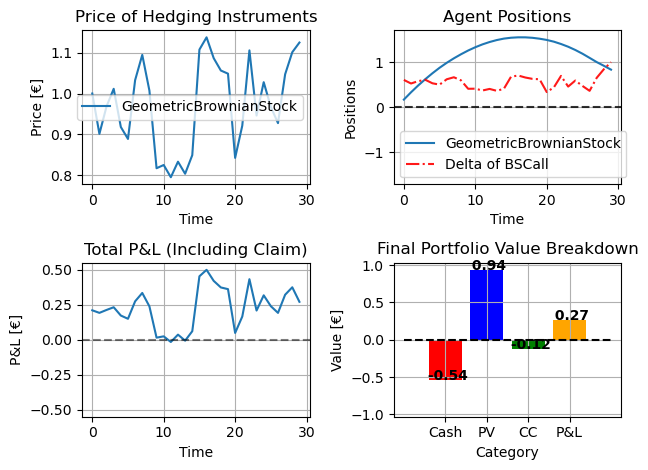

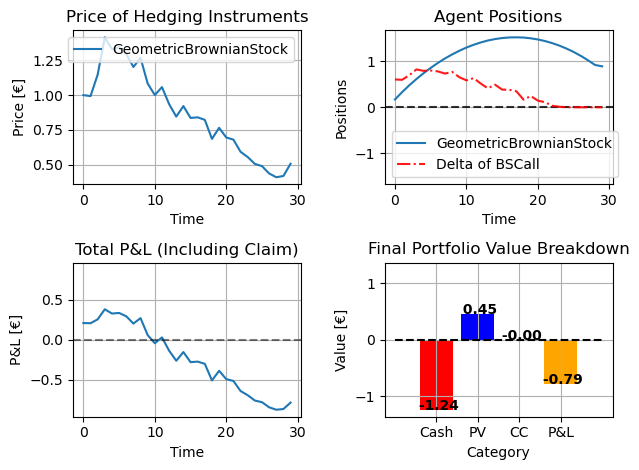

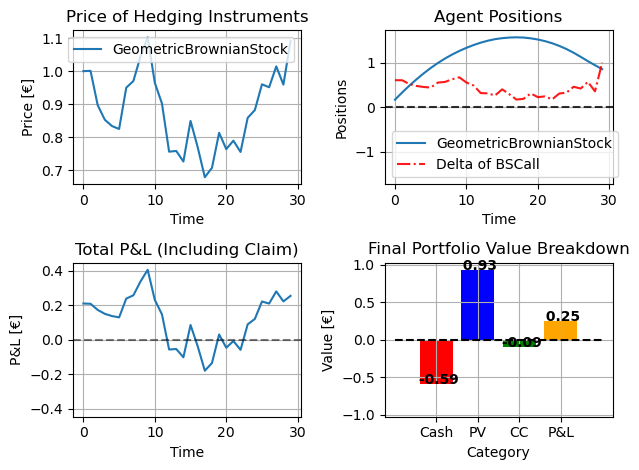

In [8]:
# Exp 1
simple_runner = ExperimentRunner("simple", pref_gpu=True)
res = simple_runner.run(contingent_claim, hedging_instruments, criterion, T, step_interest_rate, epochs, paths, verbose, cost_function, h_dim)
print(res)

output_folder = "/kaggle/working"
filename = f"{output_folder}/{simple_runner.agent_type}_hd_{h_dim}_e_{epochs}_p_{paths}_s_{seed}_pc_{prop_cost: .1f}"
simple_runner.plot_runner(animate=False, save=save, file_prefix=filename, n=n)

Running on CUDA GPU


Training:   0%|          | 1/200 [00:03<12:08,  3.66s/epoch]

Epoch: 0, Loss:  47.08


Training:   1%|          | 2/200 [00:07<11:58,  3.63s/epoch]

Epoch: 1, Loss:  29.52


Training:   2%|▏         | 3/200 [00:10<11:51,  3.61s/epoch]

Epoch: 2, Loss:  23.36


Training:   2%|▏         | 4/200 [00:14<11:49,  3.62s/epoch]

Epoch: 3, Loss:  9.59


Training:   2%|▎         | 5/200 [00:18<12:00,  3.70s/epoch]

Epoch: 4, Loss:  8.40


Training:   3%|▎         | 6/200 [00:21<11:55,  3.69s/epoch]

Epoch: 5, Loss:  22.84


Training:   4%|▎         | 7/200 [00:25<11:51,  3.69s/epoch]

Epoch: 6, Loss:  17.82


Training:   4%|▍         | 8/200 [00:29<11:42,  3.66s/epoch]

Epoch: 7, Loss:  9.94


Training:   4%|▍         | 9/200 [00:32<11:36,  3.65s/epoch]

Epoch: 8, Loss:  6.28


Training:   5%|▌         | 10/200 [00:36<11:34,  3.65s/epoch]

Epoch: 9, Loss:  9.48


Training:   6%|▌         | 11/200 [00:40<11:26,  3.63s/epoch]

Epoch: 10, Loss:  9.27


Training:   6%|▌         | 12/200 [00:43<11:20,  3.62s/epoch]

Epoch: 11, Loss:  8.35


Training:   6%|▋         | 13/200 [00:47<11:20,  3.64s/epoch]

Epoch: 12, Loss:  10.66


Training:   7%|▋         | 14/200 [00:51<11:41,  3.77s/epoch]

Epoch: 13, Loss:  9.41


Training:   8%|▊         | 15/200 [00:55<11:28,  3.72s/epoch]

Epoch: 14, Loss:  10.50


Training:   8%|▊         | 16/200 [00:58<11:21,  3.70s/epoch]

Epoch: 15, Loss:  10.86


Training:   8%|▊         | 17/200 [01:02<11:11,  3.67s/epoch]

Epoch: 16, Loss:  11.19


Training:   9%|▉         | 18/200 [01:05<11:03,  3.65s/epoch]

Epoch: 17, Loss:  10.05


Training:  10%|▉         | 19/200 [01:09<11:02,  3.66s/epoch]

Epoch: 18, Loss:  9.36


Training:  10%|█         | 20/200 [01:13<10:55,  3.64s/epoch]

Epoch: 19, Loss:  9.25


Training:  10%|█         | 21/200 [01:16<10:49,  3.63s/epoch]

Epoch: 20, Loss:  7.84


Training:  11%|█         | 22/200 [01:20<10:47,  3.64s/epoch]

Epoch: 21, Loss:  9.17


Training:  12%|█▏        | 23/200 [01:24<10:46,  3.65s/epoch]

Epoch: 22, Loss:  6.75


Training:  12%|█▏        | 24/200 [01:27<10:39,  3.63s/epoch]

Epoch: 23, Loss:  6.71


Training:  12%|█▎        | 25/200 [01:31<10:36,  3.63s/epoch]

Epoch: 24, Loss:  6.64


Training:  13%|█▎        | 26/200 [01:35<10:31,  3.63s/epoch]

Epoch: 25, Loss:  5.88


Training:  14%|█▎        | 27/200 [01:38<10:26,  3.62s/epoch]

Epoch: 26, Loss:  5.31


Training:  14%|█▍        | 28/200 [01:42<10:25,  3.64s/epoch]

Epoch: 27, Loss:  5.63


Training:  14%|█▍        | 29/200 [01:45<10:20,  3.63s/epoch]

Epoch: 28, Loss:  6.37


Training:  15%|█▌        | 30/200 [01:49<10:14,  3.62s/epoch]

Epoch: 29, Loss:  6.83


Training:  16%|█▌        | 31/200 [01:53<10:15,  3.64s/epoch]

Epoch: 30, Loss:  6.01


Training:  16%|█▌        | 32/200 [01:56<10:09,  3.63s/epoch]

Epoch: 31, Loss:  5.43


Training:  16%|█▋        | 33/200 [02:00<10:03,  3.62s/epoch]

Epoch: 32, Loss:  5.35


Training:  17%|█▋        | 34/200 [02:03<09:58,  3.61s/epoch]

Epoch: 33, Loss:  5.15


Training:  18%|█▊        | 35/200 [02:07<09:55,  3.61s/epoch]

Epoch: 34, Loss:  4.93


Training:  18%|█▊        | 36/200 [02:11<09:51,  3.61s/epoch]

Epoch: 35, Loss:  5.48


Training:  18%|█▊        | 37/200 [02:14<09:49,  3.61s/epoch]

Epoch: 36, Loss:  5.16


Training:  19%|█▉        | 38/200 [02:18<09:44,  3.61s/epoch]

Epoch: 37, Loss:  5.65


Training:  20%|█▉        | 39/200 [02:22<09:39,  3.60s/epoch]

Epoch: 38, Loss:  4.93


Training:  20%|██        | 40/200 [02:25<09:40,  3.63s/epoch]

Epoch: 39, Loss:  5.13


Training:  20%|██        | 41/200 [02:29<09:34,  3.62s/epoch]

Epoch: 40, Loss:  5.39


Training:  21%|██        | 42/200 [02:32<09:30,  3.61s/epoch]

Epoch: 41, Loss:  5.17


Training:  22%|██▏       | 43/200 [02:36<09:26,  3.61s/epoch]

Epoch: 42, Loss:  5.01


Training:  22%|██▏       | 44/200 [02:40<09:21,  3.60s/epoch]

Epoch: 43, Loss:  4.63


Training:  22%|██▎       | 45/200 [02:43<09:18,  3.60s/epoch]

Epoch: 44, Loss:  3.92


Training:  23%|██▎       | 46/200 [02:47<09:17,  3.62s/epoch]

Epoch: 45, Loss:  3.80


Training:  24%|██▎       | 47/200 [02:50<09:13,  3.62s/epoch]

Epoch: 46, Loss:  3.45


Training:  24%|██▍       | 48/200 [02:54<09:11,  3.63s/epoch]

Epoch: 47, Loss:  3.13


Training:  24%|██▍       | 49/200 [02:58<09:14,  3.67s/epoch]

Epoch: 48, Loss:  3.45


Training:  25%|██▌       | 50/200 [03:01<09:06,  3.65s/epoch]

Epoch: 49, Loss:  3.38


Training:  26%|██▌       | 51/200 [03:05<09:00,  3.63s/epoch]

Epoch: 50, Loss:  3.79


Training:  26%|██▌       | 52/200 [03:09<08:55,  3.62s/epoch]

Epoch: 51, Loss:  3.97


Training:  26%|██▋       | 53/200 [03:12<08:51,  3.61s/epoch]

Epoch: 52, Loss:  2.87


Training:  27%|██▋       | 54/200 [03:16<08:46,  3.61s/epoch]

Epoch: 53, Loss:  2.59


Training:  28%|██▊       | 55/200 [03:19<08:43,  3.61s/epoch]

Epoch: 54, Loss:  2.83


Training:  28%|██▊       | 56/200 [03:23<08:39,  3.61s/epoch]

Epoch: 55, Loss:  2.81


Training:  28%|██▊       | 57/200 [03:27<08:36,  3.61s/epoch]

Epoch: 56, Loss:  2.76


Training:  29%|██▉       | 58/200 [03:31<08:45,  3.70s/epoch]

Epoch: 57, Loss:  2.82


Training:  30%|██▉       | 59/200 [03:34<08:38,  3.68s/epoch]

Epoch: 58, Loss:  2.77


Training:  30%|███       | 60/200 [03:38<08:32,  3.66s/epoch]

Epoch: 59, Loss:  2.73


Training:  30%|███       | 61/200 [03:41<08:26,  3.64s/epoch]

Epoch: 60, Loss:  2.38


Training:  31%|███       | 62/200 [03:45<08:22,  3.64s/epoch]

Epoch: 61, Loss:  2.32


Training:  32%|███▏      | 63/200 [03:49<08:17,  3.63s/epoch]

Epoch: 62, Loss:  2.12


Training:  32%|███▏      | 64/200 [03:52<08:13,  3.63s/epoch]

Epoch: 63, Loss:  2.21


Training:  32%|███▎      | 65/200 [03:56<08:11,  3.64s/epoch]

Epoch: 64, Loss:  2.22


Training:  33%|███▎      | 66/200 [04:00<08:05,  3.63s/epoch]

Epoch: 65, Loss:  2.24


Training:  34%|███▎      | 67/200 [04:04<08:18,  3.75s/epoch]

Epoch: 66, Loss:  1.79


Training:  34%|███▍      | 68/200 [04:07<08:08,  3.70s/epoch]

Epoch: 67, Loss:  1.94


Training:  34%|███▍      | 69/200 [04:11<08:00,  3.67s/epoch]

Epoch: 68, Loss:  1.98


Training:  35%|███▌      | 70/200 [04:14<07:53,  3.64s/epoch]

Epoch: 69, Loss:  2.03


Training:  36%|███▌      | 71/200 [04:18<07:48,  3.63s/epoch]

Epoch: 70, Loss:  2.33


Training:  36%|███▌      | 72/200 [04:22<07:43,  3.62s/epoch]

Epoch: 71, Loss:  2.10


Training:  36%|███▋      | 73/200 [04:25<07:41,  3.63s/epoch]

Epoch: 72, Loss:  2.03


Training:  37%|███▋      | 74/200 [04:29<07:36,  3.62s/epoch]

Epoch: 73, Loss:  1.95


Training:  38%|███▊      | 75/200 [04:32<07:32,  3.62s/epoch]

Epoch: 74, Loss:  1.74


Training:  38%|███▊      | 76/200 [04:36<07:32,  3.65s/epoch]

Epoch: 75, Loss:  1.55


Training:  38%|███▊      | 77/200 [04:40<07:27,  3.64s/epoch]

Epoch: 76, Loss:  1.99


Training:  39%|███▉      | 78/200 [04:43<07:23,  3.63s/epoch]

Epoch: 77, Loss:  2.54


Training:  40%|███▉      | 79/200 [04:47<07:20,  3.64s/epoch]

Epoch: 78, Loss:  1.86


Training:  40%|████      | 80/200 [04:51<07:17,  3.64s/epoch]

Epoch: 79, Loss:  2.28


Training:  40%|████      | 81/200 [04:54<07:12,  3.64s/epoch]

Epoch: 80, Loss:  2.81


Training:  41%|████      | 82/200 [04:58<07:09,  3.64s/epoch]

Epoch: 81, Loss:  3.00


Training:  42%|████▏     | 83/200 [05:02<07:06,  3.65s/epoch]

Epoch: 82, Loss:  3.15


Training:  42%|████▏     | 84/200 [05:05<07:02,  3.64s/epoch]

Epoch: 83, Loss:  3.13


Training:  42%|████▎     | 85/200 [05:09<06:57,  3.63s/epoch]

Epoch: 84, Loss:  3.48


Training:  43%|████▎     | 86/200 [05:13<06:55,  3.65s/epoch]

Epoch: 85, Loss:  3.40


Training:  44%|████▎     | 87/200 [05:16<06:50,  3.64s/epoch]

Epoch: 86, Loss:  3.45


Training:  44%|████▍     | 88/200 [05:20<06:45,  3.62s/epoch]

Epoch: 87, Loss:  3.12


Training:  44%|████▍     | 89/200 [05:23<06:43,  3.64s/epoch]

Epoch: 88, Loss:  2.68


Training:  45%|████▌     | 90/200 [05:27<06:41,  3.65s/epoch]

Epoch: 89, Loss:  2.64


Training:  46%|████▌     | 91/200 [05:31<06:36,  3.64s/epoch]

Epoch: 90, Loss:  2.49


Training:  46%|████▌     | 92/200 [05:34<06:34,  3.65s/epoch]

Epoch: 91, Loss:  2.05


Training:  46%|████▋     | 93/200 [05:38<06:35,  3.70s/epoch]

Epoch: 92, Loss:  1.90


Training:  47%|████▋     | 94/200 [05:42<06:29,  3.67s/epoch]

Epoch: 93, Loss:  1.45


Training:  48%|████▊     | 95/200 [05:46<06:28,  3.70s/epoch]

Epoch: 94, Loss:  2.31


Training:  48%|████▊     | 96/200 [05:49<06:22,  3.68s/epoch]

Epoch: 95, Loss:  2.90


Training:  48%|████▊     | 97/200 [05:53<06:16,  3.65s/epoch]

Epoch: 96, Loss:  1.61


Training:  49%|████▉     | 98/200 [05:56<06:13,  3.66s/epoch]

Epoch: 97, Loss:  2.20


Training:  50%|████▉     | 99/200 [06:00<06:09,  3.65s/epoch]

Epoch: 98, Loss:  2.26


Training:  50%|█████     | 100/200 [06:04<06:05,  3.65s/epoch]

Epoch: 99, Loss:  2.47


Training:  50%|█████     | 101/200 [06:07<06:02,  3.66s/epoch]

Epoch: 100, Loss:  2.66


Training:  51%|█████     | 102/200 [06:12<06:11,  3.79s/epoch]

Epoch: 101, Loss:  2.81


Training:  52%|█████▏    | 103/200 [06:15<06:03,  3.74s/epoch]

Epoch: 102, Loss:  2.88


Training:  52%|█████▏    | 104/200 [06:19<05:56,  3.71s/epoch]

Epoch: 103, Loss:  2.79


Training:  52%|█████▎    | 105/200 [06:22<05:50,  3.69s/epoch]

Epoch: 104, Loss:  2.88


Training:  53%|█████▎    | 106/200 [06:26<05:45,  3.68s/epoch]

Epoch: 105, Loss:  2.61


Training:  54%|█████▎    | 107/200 [06:30<05:42,  3.68s/epoch]

Epoch: 106, Loss:  2.72


Training:  54%|█████▍    | 108/200 [06:33<05:36,  3.66s/epoch]

Epoch: 107, Loss:  2.41


Training:  55%|█████▍    | 109/200 [06:37<05:34,  3.68s/epoch]

Epoch: 108, Loss:  2.27


Training:  55%|█████▌    | 110/200 [06:41<05:33,  3.70s/epoch]

Epoch: 109, Loss:  2.03


Training:  56%|█████▌    | 111/200 [06:45<05:29,  3.70s/epoch]

Epoch: 110, Loss:  2.05


Training:  56%|█████▌    | 112/200 [06:48<05:25,  3.70s/epoch]

Epoch: 111, Loss:  1.66


Training:  56%|█████▋    | 113/200 [06:52<05:21,  3.70s/epoch]

Epoch: 112, Loss:  1.35


Training:  57%|█████▋    | 114/200 [06:56<05:16,  3.68s/epoch]

Epoch: 113, Loss:  1.33


Training:  57%|█████▊    | 115/200 [06:59<05:12,  3.68s/epoch]

Epoch: 114, Loss:  1.30


Training:  58%|█████▊    | 116/200 [07:03<05:11,  3.71s/epoch]

Epoch: 115, Loss:  1.35


Training:  58%|█████▊    | 117/200 [07:07<05:07,  3.70s/epoch]

Epoch: 116, Loss:  1.42


Training:  59%|█████▉    | 118/200 [07:10<05:02,  3.68s/epoch]

Epoch: 117, Loss:  1.32


Training:  60%|█████▉    | 119/200 [07:14<05:01,  3.72s/epoch]

Epoch: 118, Loss:  1.24


Training:  60%|██████    | 120/200 [07:18<04:55,  3.69s/epoch]

Epoch: 119, Loss:  1.23


Training:  60%|██████    | 121/200 [07:22<04:53,  3.71s/epoch]

Epoch: 120, Loss:  1.48


Training:  61%|██████    | 122/200 [07:25<04:49,  3.71s/epoch]

Epoch: 121, Loss:  1.45


Training:  62%|██████▏   | 123/200 [07:29<04:44,  3.70s/epoch]

Epoch: 122, Loss:  1.24


Training:  62%|██████▏   | 124/200 [07:33<04:40,  3.69s/epoch]

Epoch: 123, Loss:  1.33


Training:  62%|██████▎   | 125/200 [07:36<04:37,  3.70s/epoch]

Epoch: 124, Loss:  1.36


Training:  63%|██████▎   | 126/200 [07:40<04:33,  3.69s/epoch]

Epoch: 125, Loss:  1.47


Training:  64%|██████▎   | 127/200 [07:44<04:29,  3.69s/epoch]

Epoch: 126, Loss:  1.47


Training:  64%|██████▍   | 128/200 [07:48<04:34,  3.82s/epoch]

Epoch: 127, Loss:  1.31


Training:  64%|██████▍   | 129/200 [07:51<04:26,  3.76s/epoch]

Epoch: 128, Loss:  1.23


Training:  65%|██████▌   | 130/200 [07:55<04:20,  3.72s/epoch]

Epoch: 129, Loss:  1.20


Training:  66%|██████▌   | 131/200 [07:59<04:15,  3.70s/epoch]

Epoch: 130, Loss:  1.33


Training:  66%|██████▌   | 132/200 [08:02<04:11,  3.69s/epoch]

Epoch: 131, Loss:  1.16


Training:  66%|██████▋   | 133/200 [08:06<04:07,  3.70s/epoch]

Epoch: 132, Loss:  1.25


Training:  67%|██████▋   | 134/200 [08:10<04:02,  3.68s/epoch]

Epoch: 133, Loss:  1.24


Training:  68%|██████▊   | 135/200 [08:13<04:00,  3.70s/epoch]

Epoch: 134, Loss:  1.29


Training:  68%|██████▊   | 136/200 [08:17<03:55,  3.69s/epoch]

Epoch: 135, Loss:  1.24


Training:  68%|██████▊   | 137/200 [08:21<03:51,  3.67s/epoch]

Epoch: 136, Loss:  1.29


Training:  69%|██████▉   | 138/200 [08:24<03:46,  3.65s/epoch]

Epoch: 137, Loss:  1.25


Training:  70%|██████▉   | 139/200 [08:28<03:42,  3.64s/epoch]

Epoch: 138, Loss:  1.09


Training:  70%|███████   | 140/200 [08:32<03:37,  3.63s/epoch]

Epoch: 139, Loss:  1.34


Training:  70%|███████   | 141/200 [08:35<03:33,  3.63s/epoch]

Epoch: 140, Loss:  1.31


Training:  71%|███████   | 142/200 [08:39<03:30,  3.62s/epoch]

Epoch: 141, Loss:  1.49


Training:  72%|███████▏  | 143/200 [08:42<03:26,  3.62s/epoch]

Epoch: 142, Loss:  1.30


Training:  72%|███████▏  | 144/200 [08:46<03:23,  3.63s/epoch]

Epoch: 143, Loss:  1.10


Training:  72%|███████▎  | 145/200 [08:50<03:20,  3.65s/epoch]

Epoch: 144, Loss:  1.16


Training:  73%|███████▎  | 146/200 [08:53<03:16,  3.64s/epoch]

Epoch: 145, Loss:  1.28


Training:  74%|███████▎  | 147/200 [08:57<03:12,  3.63s/epoch]

Epoch: 146, Loss:  1.13


Training:  74%|███████▍  | 148/200 [09:01<03:08,  3.63s/epoch]

Epoch: 147, Loss:  1.30


Training:  74%|███████▍  | 149/200 [09:04<03:05,  3.64s/epoch]

Epoch: 148, Loss:  1.26


Training:  75%|███████▌  | 150/200 [09:08<03:01,  3.63s/epoch]

Epoch: 149, Loss:  1.13


Training:  76%|███████▌  | 151/200 [09:12<02:57,  3.62s/epoch]

Epoch: 150, Loss:  1.26


Training:  76%|███████▌  | 152/200 [09:15<02:53,  3.62s/epoch]

Epoch: 151, Loss:  1.28


Training:  76%|███████▋  | 153/200 [09:19<02:49,  3.61s/epoch]

Epoch: 152, Loss:  1.24


Training:  77%|███████▋  | 154/200 [09:23<02:48,  3.67s/epoch]

Epoch: 153, Loss:  1.49


Training:  78%|███████▊  | 155/200 [09:26<02:44,  3.65s/epoch]

Epoch: 154, Loss:  1.52


Training:  78%|███████▊  | 156/200 [09:30<02:40,  3.65s/epoch]

Epoch: 155, Loss:  1.47


Training:  78%|███████▊  | 157/200 [09:33<02:36,  3.63s/epoch]

Epoch: 156, Loss:  1.31


Training:  79%|███████▉  | 158/200 [09:37<02:32,  3.62s/epoch]

Epoch: 157, Loss:  1.32


Training:  80%|███████▉  | 159/200 [09:41<02:28,  3.62s/epoch]

Epoch: 158, Loss:  1.17


Training:  80%|████████  | 160/200 [09:44<02:24,  3.61s/epoch]

Epoch: 159, Loss:  0.95


Training:  80%|████████  | 161/200 [09:48<02:21,  3.63s/epoch]

Epoch: 160, Loss:  1.59


Training:  81%|████████  | 162/200 [09:51<02:17,  3.62s/epoch]

Epoch: 161, Loss:  1.35


Training:  82%|████████▏ | 163/200 [09:55<02:18,  3.74s/epoch]

Epoch: 162, Loss:  1.14


Training:  82%|████████▏ | 164/200 [09:59<02:13,  3.70s/epoch]

Epoch: 163, Loss:  1.11


Training:  82%|████████▎ | 165/200 [10:03<02:08,  3.68s/epoch]

Epoch: 164, Loss:  1.19


Training:  83%|████████▎ | 166/200 [10:06<02:05,  3.68s/epoch]

Epoch: 165, Loss:  1.24


Training:  84%|████████▎ | 167/200 [10:10<02:01,  3.67s/epoch]

Epoch: 166, Loss:  1.40


Training:  84%|████████▍ | 168/200 [10:14<01:57,  3.66s/epoch]

Epoch: 167, Loss:  1.26


Training:  84%|████████▍ | 169/200 [10:17<01:53,  3.66s/epoch]

Epoch: 168, Loss:  1.31


Training:  85%|████████▌ | 170/200 [10:21<01:49,  3.65s/epoch]

Epoch: 169, Loss:  1.17


Training:  86%|████████▌ | 171/200 [10:25<01:45,  3.65s/epoch]

Epoch: 170, Loss:  1.12


Training:  86%|████████▌ | 172/200 [10:29<01:44,  3.75s/epoch]

Epoch: 171, Loss:  1.08


Training:  86%|████████▋ | 173/200 [10:32<01:40,  3.71s/epoch]

Epoch: 172, Loss:  1.20


Training:  87%|████████▋ | 174/200 [10:36<01:36,  3.70s/epoch]

Epoch: 173, Loss:  1.05


Training:  88%|████████▊ | 175/200 [10:40<01:31,  3.68s/epoch]

Epoch: 174, Loss:  1.09


Training:  88%|████████▊ | 176/200 [10:43<01:27,  3.66s/epoch]

Epoch: 175, Loss:  0.97


Training:  88%|████████▊ | 177/200 [10:47<01:24,  3.66s/epoch]

Epoch: 176, Loss:  1.00


Training:  89%|████████▉ | 178/200 [10:50<01:20,  3.65s/epoch]

Epoch: 177, Loss:  0.97


Training:  90%|████████▉ | 179/200 [10:54<01:16,  3.63s/epoch]

Epoch: 178, Loss:  0.99


Training:  90%|█████████ | 180/200 [10:58<01:12,  3.62s/epoch]

Epoch: 179, Loss:  0.99


Training:  90%|█████████ | 181/200 [11:01<01:08,  3.63s/epoch]

Epoch: 180, Loss:  0.96


Training:  91%|█████████ | 182/200 [11:05<01:05,  3.62s/epoch]

Epoch: 181, Loss:  1.04


Training:  92%|█████████▏| 183/200 [11:08<01:01,  3.62s/epoch]

Epoch: 182, Loss:  1.14


Training:  92%|█████████▏| 184/200 [11:12<00:57,  3.62s/epoch]

Epoch: 183, Loss:  1.08


Training:  92%|█████████▎| 185/200 [11:16<00:54,  3.62s/epoch]

Epoch: 184, Loss:  1.02


Training:  93%|█████████▎| 186/200 [11:19<00:50,  3.62s/epoch]

Epoch: 185, Loss:  1.18


Training:  94%|█████████▎| 187/200 [11:23<00:46,  3.62s/epoch]

Epoch: 186, Loss:  0.98


Training:  94%|█████████▍| 188/200 [11:27<00:43,  3.63s/epoch]

Epoch: 187, Loss:  1.14


Training:  94%|█████████▍| 189/200 [11:30<00:40,  3.65s/epoch]

Epoch: 188, Loss:  1.03


Training:  95%|█████████▌| 190/200 [11:34<00:36,  3.65s/epoch]

Epoch: 189, Loss:  1.01


Training:  96%|█████████▌| 191/200 [11:38<00:33,  3.67s/epoch]

Epoch: 190, Loss:  1.07


Training:  96%|█████████▌| 192/200 [11:41<00:29,  3.67s/epoch]

Epoch: 191, Loss:  1.08


Training:  96%|█████████▋| 193/200 [11:45<00:25,  3.67s/epoch]

Epoch: 192, Loss:  0.97


Training:  97%|█████████▋| 194/200 [11:49<00:21,  3.66s/epoch]

Epoch: 193, Loss:  1.02


Training:  98%|█████████▊| 195/200 [11:52<00:18,  3.65s/epoch]

Epoch: 194, Loss:  1.03


Training:  98%|█████████▊| 196/200 [11:56<00:14,  3.65s/epoch]

Epoch: 195, Loss:  0.95


Training:  98%|█████████▊| 197/200 [12:00<00:10,  3.66s/epoch]

Epoch: 196, Loss:  0.95


Training:  99%|█████████▉| 198/200 [12:04<00:07,  3.74s/epoch]

Epoch: 197, Loss:  0.90


Training: 100%|█████████▉| 199/200 [12:07<00:03,  3.71s/epoch]

Epoch: 198, Loss:  1.09


Epoch: 199, Loss:  1.01


-0.920440137386322


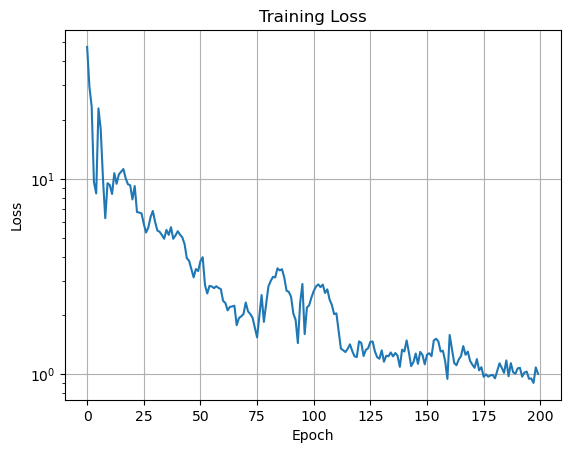

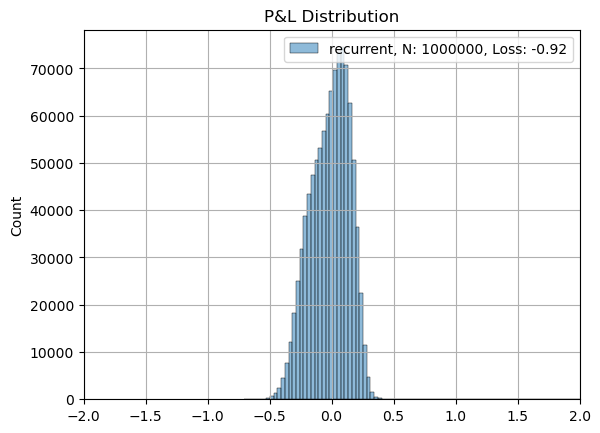

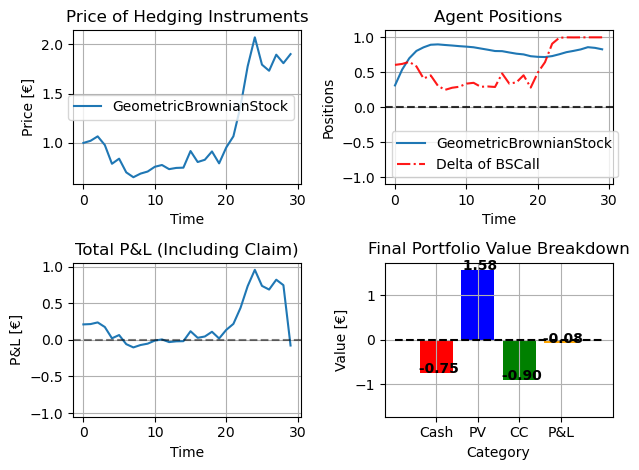

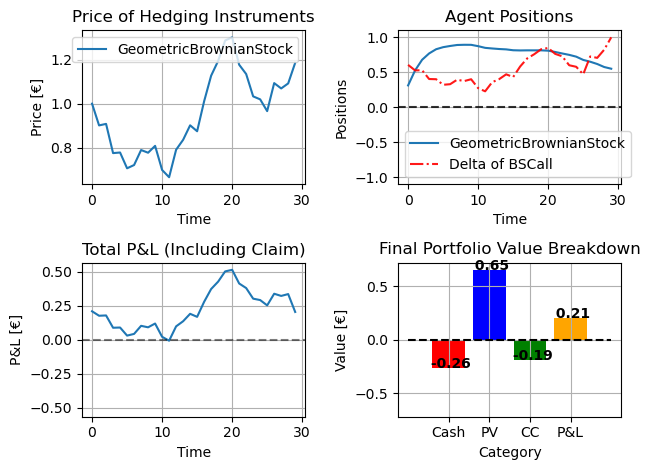

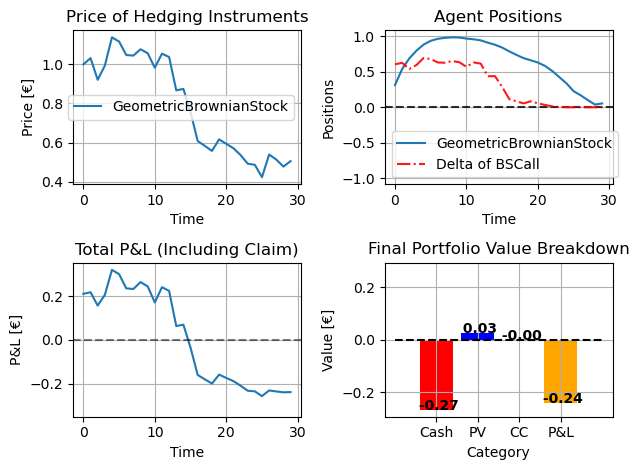

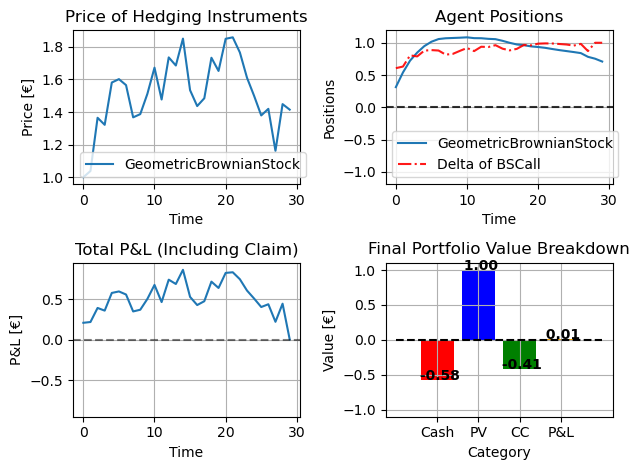

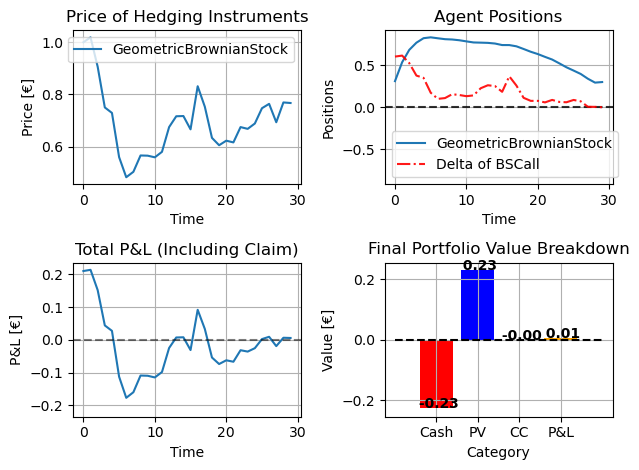

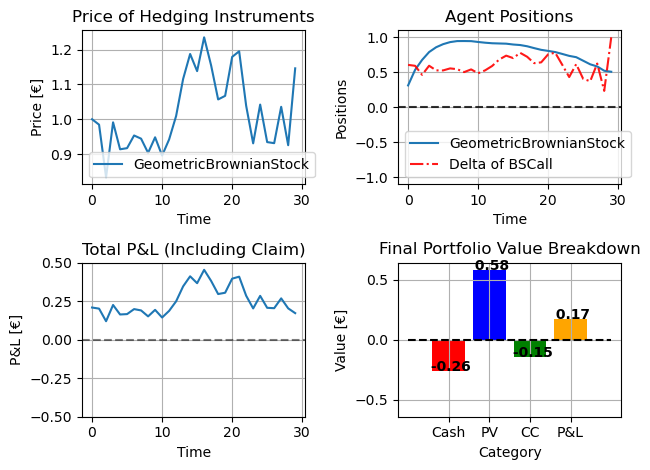

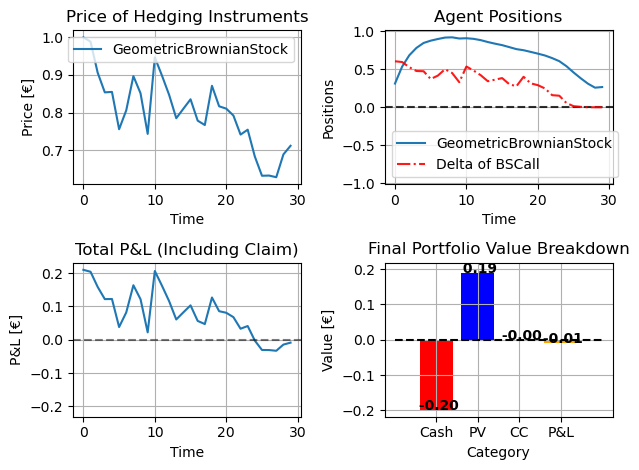

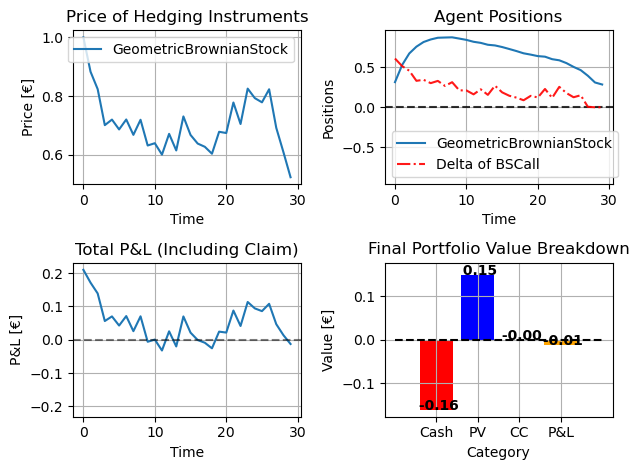

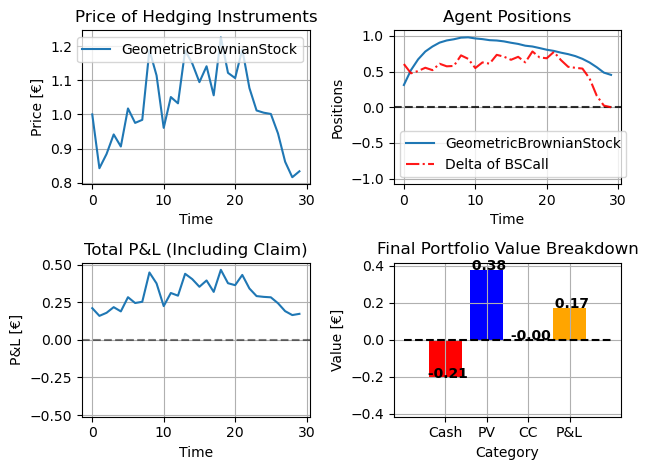

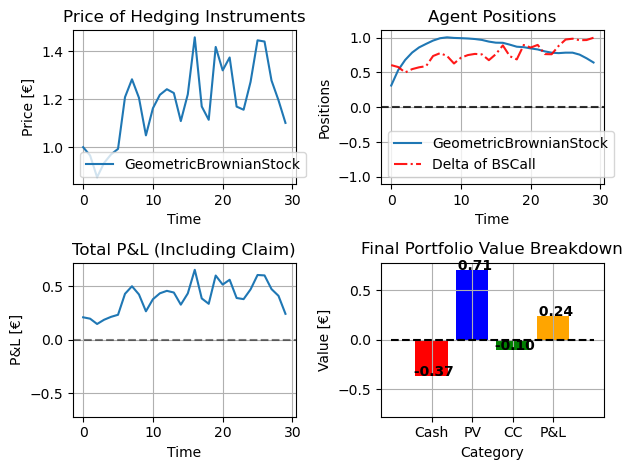

<Axes: title={'center': 'P&L Distribution'}, ylabel='Count'>

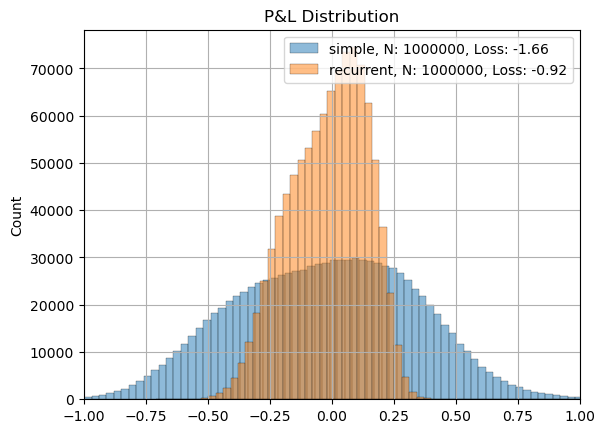

In [9]:
# Exp 2
recurrent_runner = ExperimentRunner("recurrent")
res = recurrent_runner.run(contingent_claim, hedging_instruments, criterion, T, step_interest_rate, epochs, paths, verbose, cost_function, h_dim)
print(res)

output_folder = "/kaggle/working"
filename = f"{output_folder}/{recurrent_runner.agent_type}_hd_{h_dim}_e_{epochs}_p_{paths}_s_{seed}_pc_{prop_cost: .1f}"
recurrent_runner.plot_runner(animate=animate, save=save, file_prefix=filename, n=n)
plot_dists([simple_runner, recurrent_runner], save=save, file_prefix=filename, x_lim=1)

Running on CUDA GPU
-0.5734915733337402


<Axes: title={'center': 'P&L Distribution'}, ylabel='Count'>

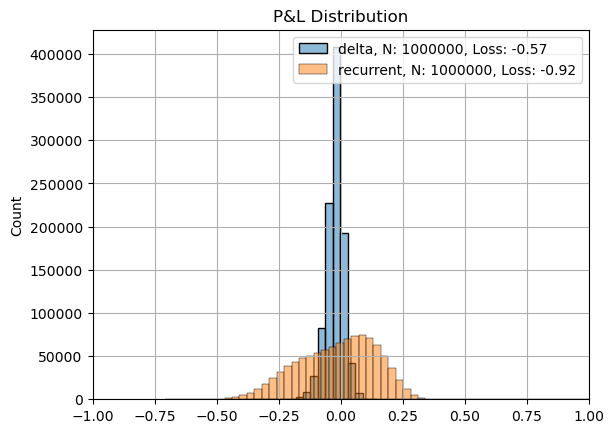

In [10]:
# Exp 3 Compare with delta hedge

stock_params = [S0, T, drift, volatility] #strike, expiry, rate, volatility
delta_runner = SimpleRunner("delta")
res = delta_runner.run(contingent_claim, hedging_instruments, criterion, T, step_interest_rate, epochs, paths, verbose, cost_function, extra_params=stock_params)
print(res)
plot_dists([delta_runner, recurrent_runner], save=save, file_prefix=filename, x_lim=1)